# <div style="text-align:center; background-color:#940B92; border-radius:10px 20px; padding:10px; margin:15px; ">Fitness Club</div>

<img src="https://media.self.com/photos/6398b36c72eb56f726777d06/1:1/w_2400,h_2400,c_limit/weekly-workout-schedule.jpeg" alt="Fitnes" width="500" style="border-radius:20px">

<p> 
This notebook looks into using various Pyhton-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting a member will not attend the class, they can make another space
available..

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation
</p>

## 1. Problem Definition

In a statement,
> Given Many features of popular brands' phones, including price, ram, storage etc. Can we predict the price for the phones ?

## 2. Data

GoalZone is a fitness club chain in Canada.
GoalZone offers a range of fitness classes in two capacities - 25 and 15.
Some classes are always fully booked. Fully booked classes often have a low attendance rate.
GoalZone wants to increase the number of spaces available for classes.
They want to do this by predicting whether the member will attend the class or not.


https://www.kaggle.com/datasets/ddosad/datacamps-data-science-associate-certification


## 3. Evaluation

> If we can predict a member will not attend the class, they can make another space available.

## 4. Features



## <div style="text-align:left; ">Preparing Tools</div>
We're going to use pandas, matplotlib and numpy for data analysis and manipulations

In [1]:
# Import Tools

# Regular EDA plotting libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn import set_config

# set_config(print_changed_only=False)


# Tranformation data using Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, PowerTransformer, MaxAbsScaler
from sklearn.compose import ColumnTransformer

# to take care missing value
from sklearn.impute import SimpleImputer

# To take care categorical variable
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

In [2]:
df_fitnes = pd.read_csv("fitness_class_2212.csv")
df_fitnes

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


## <div style="text-align:left; ">Data Understanding</div>

In [3]:
df_fitnes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [4]:
for col in df_fitnes.columns:
    print(col, '-->', len(col), '-->', df_fitnes[col].unique())

booking_id --> 10 --> [   1    2    3 ... 1498 1499 1500]
months_as_member --> 16 --> [ 17  10  16   5  15   7  11   9  23  13   8  22   6  33  24  14   2  12
  26  28  27   1   3  21  18  19  53  20  34  25  32  73  55   4  35  54
  76  62  42 105  90  29  60  30 107  52  37  38  48  51  40  89  57  36
  44  39  41  47  58  66  45  43  61  50  65  31  97  59  93 148 111  69]
weight --> 6 --> [79.56 79.01 74.53 ... 87.38 68.64 94.39]
days_before --> 11 --> ['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 days' '20' '1'
 '15' '6 days' '11' '13 days' '3 days' '16' '1 days' '7 days' '8 days'
 '10 days' '14 days' '17' '5 days' '2 days' '4 days' '29']
day_of_week --> 11 --> ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']
time --> 4 --> ['PM' 'AM']
category --> 8 --> ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']
attended --> 8 --> [0 1]


There are some data that we need to correction in this dataset, like in columns `days_before`, `day_of_week`, and `category`

In [5]:
df_fitnes['days_before'] = df_fitnes['days_before'].str.replace(' days', '').astype(int)

In [6]:
df_fitnes['days_before'].unique()

array([ 8,  2, 14, 10,  6,  4,  9, 12,  5,  3,  7, 13, 20,  1, 15, 11, 16,
       17, 29])

In [7]:
df_fitnes['day_of_week'] = df_fitnes['day_of_week'].str[:3]
day_mapping={
    'Mon':1,
    'Tue':2,
    'Wed':3,
    'Thu':4,
    'Fri':5,
    'Sat':6,
    'Sun':7,
}

df_fitnes['day_of_week'] = df_fitnes['day_of_week'].map(day_mapping)

In [8]:
for col in df_fitnes.columns:
    print(col, '-->', len(col), '-->', df_fitnes[col].unique())

booking_id --> 10 --> [   1    2    3 ... 1498 1499 1500]
months_as_member --> 16 --> [ 17  10  16   5  15   7  11   9  23  13   8  22   6  33  24  14   2  12
  26  28  27   1   3  21  18  19  53  20  34  25  32  73  55   4  35  54
  76  62  42 105  90  29  60  30 107  52  37  38  48  51  40  89  57  36
  44  39  41  47  58  66  45  43  61  50  65  31  97  59  93 148 111  69]
weight --> 6 --> [79.56 79.01 74.53 ... 87.38 68.64 94.39]
days_before --> 11 --> [ 8  2 14 10  6  4  9 12  5  3  7 13 20  1 15 11 16 17 29]
day_of_week --> 11 --> [3 1 7 5 4 2 6]
time --> 4 --> ['PM' 'AM']
category --> 8 --> ['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']
attended --> 8 --> [0 1]


In [9]:
df_fitnes['category'] = df_fitnes['category'].replace('-', 'Unknown')
df_fitnes['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', 'Unknown', 'Aqua'],
      dtype=object)

In [10]:
df_fitnes.describe()

,booking_id,months_as_member,weight,days_before,day_of_week,attended
count,1500.000000,1500.000000,1480.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,15.628667,82.610378,8.346667,4.105333,0.302667
std,433.157015,12.926543,12.765859,4.077938,1.994214,0.459565
min,1.000000,1.000000,55.410000,1.000000,1.000000,0.000000
25%,375.750000,8.000000,73.490000,4.000000,2.000000,0.000000
50%,750.500000,12.000000,80.760000,9.000000,4.000000,0.000000
75%,1125.250000,19.000000,89.520000,12.000000,6.000000,1.000000
max,1500.000000,148.000000,170.520000,29.000000,7.000000,1.000000


In [11]:
df_fitnes.describe(include=['object'])

,time,category
count,1500,1500
unique,2,6
top,AM,HIIT
freq,1141,667


<Figure size 1008x1008 with 0 Axes>

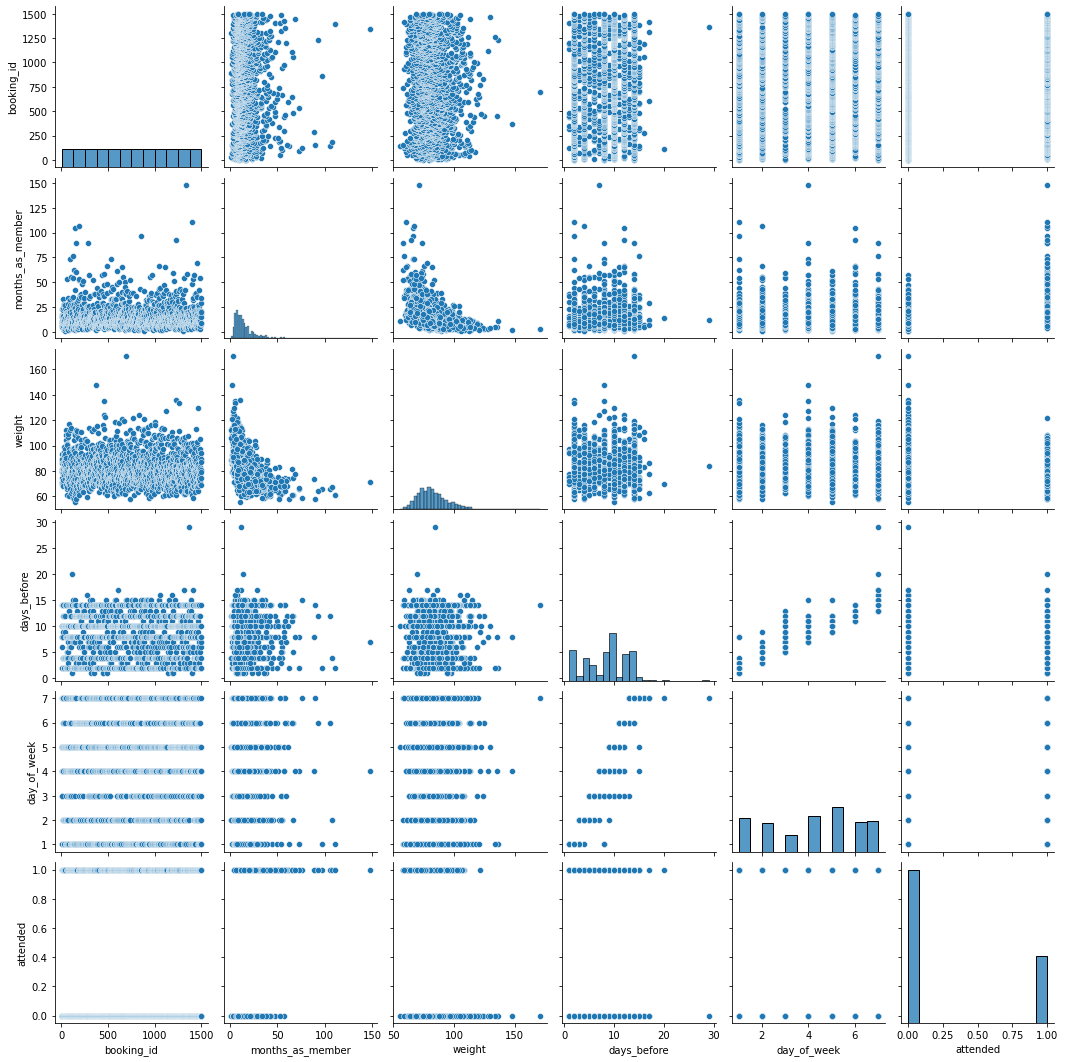

In [12]:
plt.figure(figsize=(14,14))
sns.pairplot(df_fitnes)
plt.show()

In [13]:
df_fitnes['weight'].isnull().sum()

20

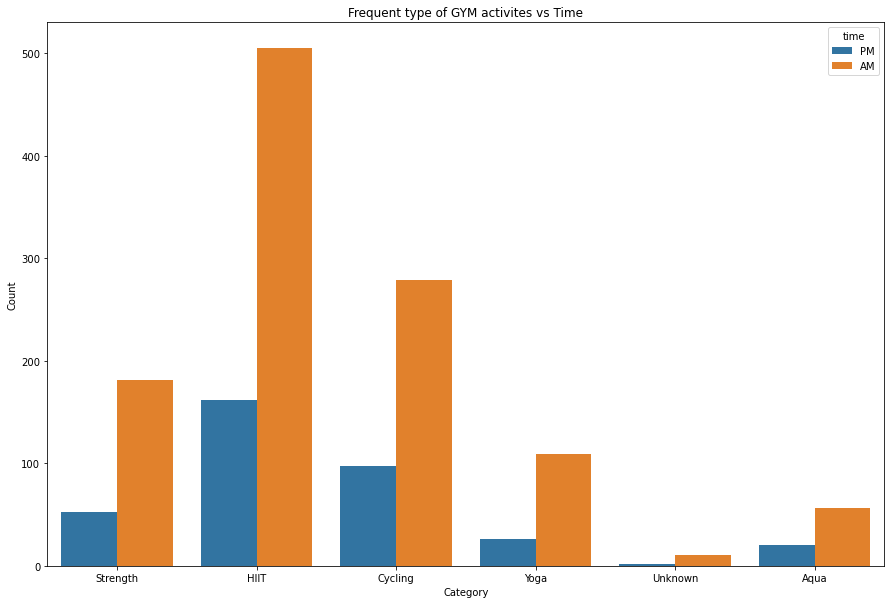

In [14]:
# Data Visualization
plt.figure(figsize=(15,10))
sns.countplot(df_fitnes, x='category', hue='time')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequent type of GYM activites vs Time')
plt.show();

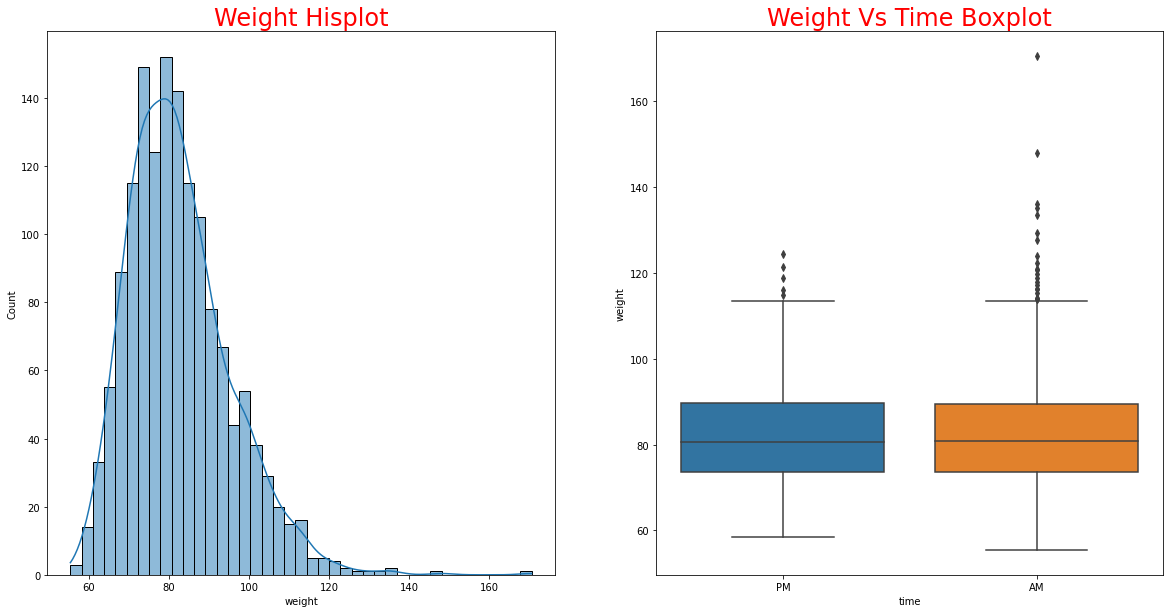

In [15]:
# Historgram plot
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title('Weight Hisplot', fontdict={'fontsize':24, 'color':'red'})
sns.histplot(df_fitnes['weight'], kde='True')

plt.subplot(122)
plt.title('Weight Vs Time Boxplot', fontdict={'fontsize':24, 'color':'red'})
sns.boxplot(df_fitnes, x='time', y='weight', orient='v')

plt.show();

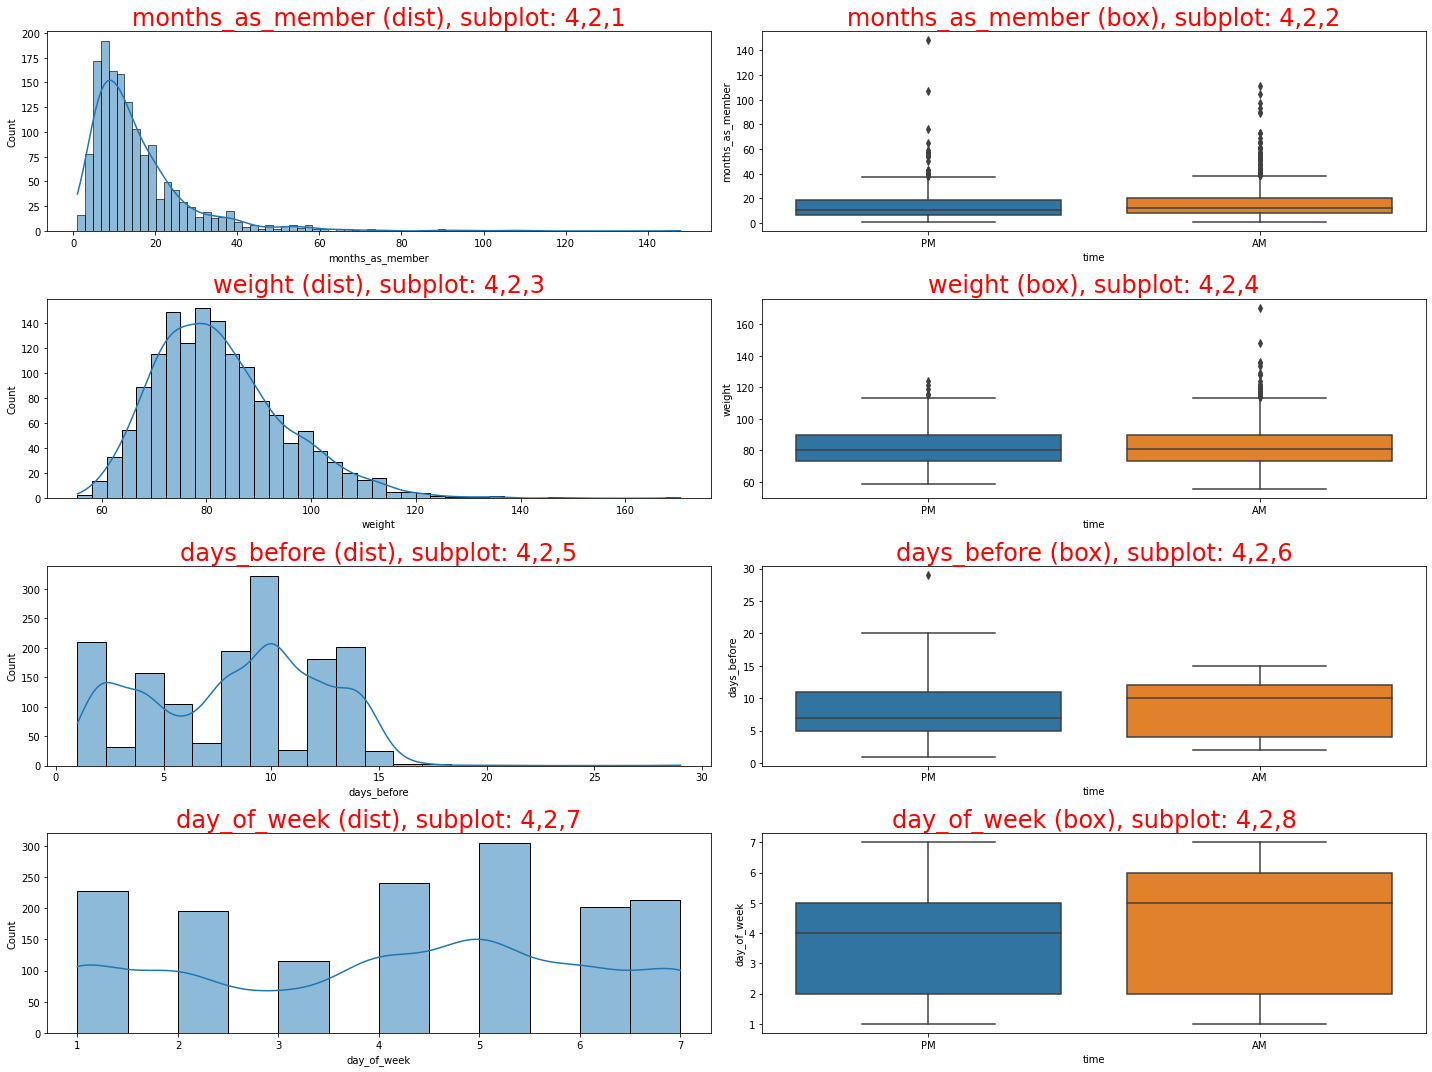

In [16]:
col_hist = ['months_as_member', 'weight', 'days_before', 'day_of_week']

row = len(col_hist)
col = 2
counter = 1

plt.figure(figsize=(20,15))

for i in col_hist:
    plt.subplot(row, col, counter)
    plt.title('{} (dist), subplot: {},{},{}'.format(i, row, col, counter), fontdict={'fontsize':24, 'color':'red'})
    sns.histplot(df_fitnes[i], kde='True')
    counter = counter + 1
    
    plt.subplot(row, col, counter)
    plt.title('{} (box), subplot: {},{},{}'.format(i, row, col, counter), fontdict={'fontsize':24, 'color':'red'})
    sns.boxplot(df_fitnes, x='time', y=i, orient='v')
    counter = counter + 1

plt.tight_layout()    
plt.show()

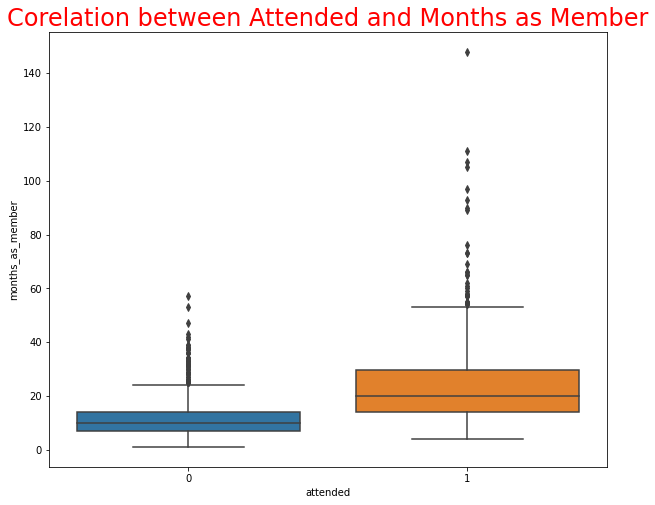

In [17]:
plt.figure(figsize=(10,8))
plt.title("Corelation between Attended and Months as Member", fontdict={'fontsize':24, 'color':'red'})
sns.boxplot(data=df_fitnes, x='attended', y='months_as_member', orient='v')
plt.show();

there is an oulier in our dataset, so let's remove this outliers

In [18]:
Q1 = df_fitnes['months_as_member'].quantile(0.25)
Q3 = df_fitnes['months_as_member'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(lower_bound, upper_bound)

-8.5 35.5


In [19]:
cleaned_df_fitnes = df_fitnes.copy()
cleaned_df_fitnes

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,3,PM,Strength,0
1,2,10,79.01,2,1,AM,HIIT,0
2,3,16,74.53,14,7,AM,Strength,0
3,4,5,86.12,10,5,AM,Cycling,0
4,5,15,69.29,8,4,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,5,AM,HIIT,0
1496,1497,29,89.55,2,1,AM,Strength,0
1497,1498,9,87.38,4,2,AM,HIIT,0
1498,1499,34,68.64,14,7,AM,Aqua,0


In [20]:
cleaned_df_fitnes = cleaned_df_fitnes[(cleaned_df_fitnes['months_as_member'] >= lower_bound) & 
                                      (cleaned_df_fitnes['months_as_member'] <= upper_bound)]

In [21]:
cleaned_df_fitnes

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,3,PM,Strength,0
1,2,10,79.01,2,1,AM,HIIT,0
2,3,16,74.53,14,7,AM,Strength,0
3,4,5,86.12,10,5,AM,Cycling,0
4,5,15,69.29,8,4,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,5,AM,HIIT,0
1496,1497,29,89.55,2,1,AM,Strength,0
1497,1498,9,87.38,4,2,AM,HIIT,0
1498,1499,34,68.64,14,7,AM,Aqua,0


In [22]:
cleaned_df_fitnes.isnull().sum()

booking_id           0
months_as_member     0
weight              19
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

## <div class='2' style="text-align:left; font-size:24px"> Let's Create Machine Learning ❤️🚥 </div>

For our first approach we used the Data Frame that still raw or used `df_fitness` and second approach we used the Data Frame that already cleaned and fill the missing data used mean or median.

#### First Model with Raw Data Frame

In [23]:
df_fitnes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   int32  
 4   day_of_week       1500 non-null   int64  
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 88.0+ KB


In [24]:
# Let's select our feature and our targets
X = df_fitnes.drop('attended', axis=1)
y = df_fitnes['attended']

In [25]:
X = pd.get_dummies(X, columns=['time', 'category'], drop_first=True)
X['weight']= X['weight'].fillna(X['weight'].mean())

In [26]:
X

,booking_id,months_as_member,weight,days_before,day_of_week,time_PM,category_Cycling,category_HIIT,category_Strength,category_Unknown,category_Yoga
0,1,17,79.56,8,3,1,0,0,1,0,0
1,2,10,79.01,2,1,0,0,1,0,0,0
2,3,16,74.53,14,7,0,0,0,1,0,0
3,4,5,86.12,10,5,0,1,0,0,0,0
4,5,15,69.29,8,4,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,5,0,0,1,0,0,0
1496,1497,29,89.55,2,1,0,0,0,1,0,0
1497,1498,9,87.38,4,2,0,0,1,0,0,0
1498,1499,34,68.64,14,7,0,0,0,0,0,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, 
                                                    random_state=4)

In [28]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
score = log_reg.score(X_test, y_test)
score

0.8

In [30]:
log_reg_pred = log_reg.predict(X_test)
log_score = precision_score(y_test, log_reg_pred)
log_score

0.7538461538461538

<AxesSubplot:>

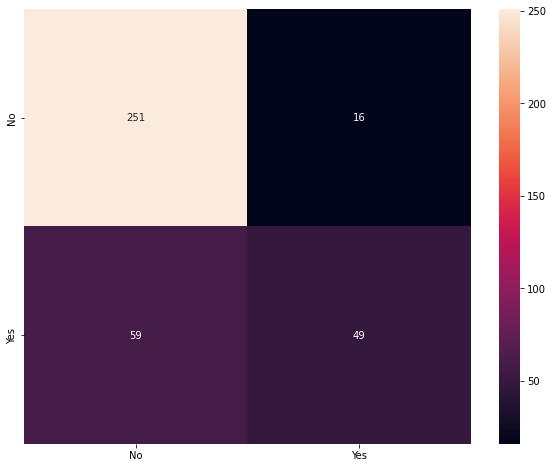

In [31]:
conf_matrix = confusion_matrix(y_test, log_reg_pred, labels=[0, 1])
df_cm = pd.DataFrame(conf_matrix, index = [i for i in ['No', 'Yes']],
                    columns= [i for i in ['No', 'Yes']])
plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, fmt='g')

C:\Users\bayu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


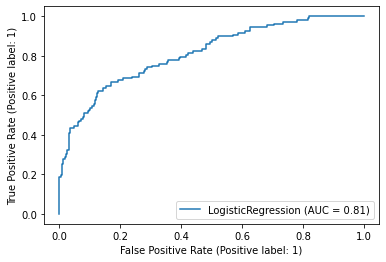

In [32]:
plot_roc_curve(log_reg, X_test, y_test)

In [33]:
log_reg.coef_

array([[ 8.32889377e-05,  1.16195234e-01, -1.50690277e-02,
        -1.29278171e-01,  2.87802457e-01, -1.71647357e-01,
        -3.77649557e-01, -2.52036138e-01, -6.11599226e-01,
        -2.41774256e-01, -1.91536606e-01]])

In [34]:
feature_dict = dict(zip(df_fitnes.columns, list(log_reg.coef_[0])))
feature_dict

{'booking_id': 8.328893773265663e-05,
 'months_as_member': 0.11619523376279758,
 'weight': -0.015069027700456336,
 'days_before': -0.12927817097367114,
 'day_of_week': 0.2878024573557182,
 'time': -0.17164735742687165,
 'category': -0.3776495570368307,
 'attended': -0.25203613797981367}

<AxesSubplot:title={'center':'Feature Importance'}>

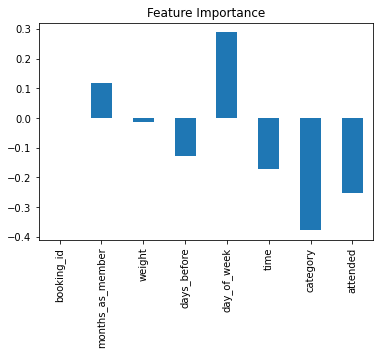

In [35]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)

In [36]:
def model_score(y_test, y_pred):
    """This function is to show metrics score of Clasification Machine Learning
    --------------------------------------------------------------------------
    y_test : Actual y value
    y_pred : Predicted y value from our model machine learning
    """
    
    model_precision_score = round(precision_score(y_test, y_pred),2)
    model_accuracy = round(accuracy_score(y_test, y_pred),2)
    model_recal_score = round(recall_score(y_test, y_pred),2)
    model_f1_score = round(f1_score(y_test, y_pred),2)
    metric_evaluations = {'precision_score':model_precision_score,
                         'accuracy':model_accuracy,
                         'recall_score':model_recal_score,
                         'f1_score':model_f1_score}
    
    print("Precision Score :", model_precision_score)
    print('Accuracy : ', model_accuracy)
    print('Recall Score : ', model_recal_score)
    print('F1 Score : ', model_f1_score)
    
    return metric_evaluations

In [37]:
baseline_metrics_raw = model_score(y_test, log_reg_pred)

Precision Score : 0.75
Accuracy :  0.8
Recall Score :  0.45
F1 Score :  0.57


In [38]:
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       267
           1       0.75      0.45      0.57       108

    accuracy                           0.80       375
   macro avg       0.78      0.70      0.72       375
weighted avg       0.79      0.80      0.78       375



In our first approach, we got that the `booking_id` is not really gave impact to our model so let's remove the columns and continued our model using cleaned data frame.


#### Second Model with Cleaned Data Frame

In [39]:
cleaned_df_fitnes

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,3,PM,Strength,0
1,2,10,79.01,2,1,AM,HIIT,0
2,3,16,74.53,14,7,AM,Strength,0
3,4,5,86.12,10,5,AM,Cycling,0
4,5,15,69.29,8,4,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,5,AM,HIIT,0
1496,1497,29,89.55,2,1,AM,Strength,0
1497,1498,9,87.38,4,2,AM,HIIT,0
1498,1499,34,68.64,14,7,AM,Aqua,0


In [40]:
X_cleaned = cleaned_df_fitnes.drop(['booking_id', 'attended'], axis=1)
y_cleaned = cleaned_df_fitnes['attended']

In [41]:
X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test = train_test_split(X_cleaned, y_cleaned,
                                                                                   test_size=0.25, 
                                                                                    random_state=4)

In [42]:
cat_features = X_cleaned.select_dtypes(include='object').columns.to_list()
num_features = X_cleaned.select_dtypes(exclude='object').columns.to_list()

In [43]:
cat_features

['time', 'category']

In [44]:
num_features

['months_as_member', 'weight', 'days_before', 'day_of_week']

In [45]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', Normalizer())
])

cat_pipeline = Pipeline([
    ('cat', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[('num', num_pipeline, num_features),
                                              ('cat', cat_pipeline, cat_features)]
                                )

In [46]:
log_reg_model = Pipeline(steps=[("preprocessor", preprocessor), ("log_reg", LogisticRegression())])

grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "preprocessor__num__scaler":[StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
    "log_reg__max_iter":[10,20,30]},

In [47]:
grid

({'preprocessor__num__imputer__strategy': ['mean', 'median'],
  'preprocessor__num__scaler': [StandardScaler(),
   MinMaxScaler(),
   Normalizer(),
   MaxAbsScaler()],
  'log_reg__max_iter': [10, 20, 30]},)

In [48]:
log_reg_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   Normalizer())]),
                                                  ['months_as_member', 'weight',
                                                   'days_before',
                                                   'day_of_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder())]),
                                                  ['time', 'category'])])),
                ('log_reg', LogisticRegression())])

In [49]:
log_reg_model.fit(X_cleaned_train, y_cleaned_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   Normalizer())]),
                                                  ['months_as_member', 'weight',
                                                   'days_before',
                                                   'day_of_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder())]),
                                                  ['time', 'category'])])),
                ('log_reg', LogisticRegression())])

In [50]:
score_log_reg = log_reg_model.score(X_cleaned_test, y_cleaned_test)
score_log_reg

0.7314285714285714

In [51]:
search_cv = RandomizedSearchCV(log_reg_model, param_distributions=grid, n_iter=10, random_state=0)
search_cv

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                Normalizer())]),
                                                                               ['months_as_member',
                                                                                'weight',
                                                                                'days_before',
                                                                                'day_of_week']),
                              

In [52]:
search_cv.fit(X_cleaned_train, y_cleaned_train)

C:\Users\bayu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bayu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\bayu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bayu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\bayu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bayu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                Normalizer())]),
                                                                               ['months_as_member',
                                                                                'weight',
                                                                                'days_before',
                                                                                'day_of_week']),
                              

In [53]:
print("Best params:")
print(search_cv.best_params_)

Best params:
{'preprocessor__num__scaler': MinMaxScaler(), 'preprocessor__num__imputer__strategy': 'mean', 'log_reg__max_iter': 10}


In [54]:
print(f"Internal CV score: {search_cv.best_score_:.3f}")

Internal CV score: 0.778


In [55]:
cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_preprocessor__num__scaler",
        "param_preprocessor__num__imputer__strategy",
        "param_log_reg__max_iter",
    ]
].head(5)


,mean_test_score,std_test_score,param_preprocessor__num__scaler,param_preprocessor__num__imputer__strategy,param_log_reg__max_iter
5,0.778455,0.034017,MinMaxScaler(),mean,10
4,0.773666,0.035944,StandardScaler(),median,30
8,0.773666,0.035944,StandardScaler(),mean,30
7,0.772718,0.030670,MaxAbsScaler(),median,30
6,0.772714,0.028863,MinMaxScaler(),median,20


In [56]:
pred_search = search_cv.predict(X_cleaned_test)

In [57]:
cleaned_data_score = model_score(y_cleaned_test, pred_search)

Precision Score : 0.61
Accuracy :  0.74
Recall Score :  0.23
F1 Score :  0.34


In [58]:
print(classification_report(y_cleaned_test, pred_search))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       251
           1       0.61      0.23      0.34        99

    accuracy                           0.74       350
   macro avg       0.68      0.59      0.59       350
weighted avg       0.71      0.74      0.70       350



<AxesSubplot:>

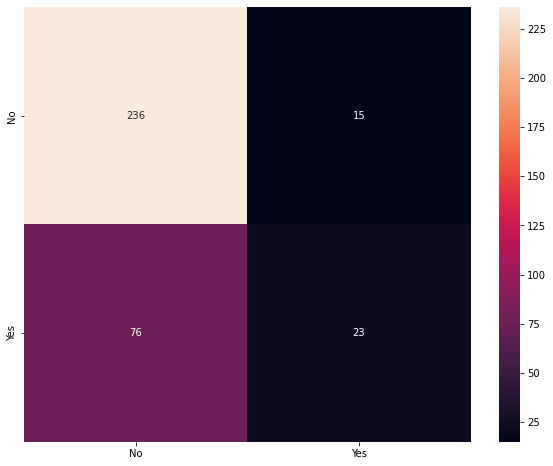

In [59]:
conf_matrix = confusion_matrix(y_cleaned_test, pred_search, labels=[0, 1])
df_cm = pd.DataFrame(conf_matrix, index = [i for i in ['No', 'Yes']],
                    columns= [i for i in ['No', 'Yes']])
plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, fmt='g')